<a href="https://colab.research.google.com/github/DarkLin02/rgpi_grupo10/blob/RamaLin/scripts/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving carton_inhibicion.jpg to carton_inhibicion.jpg


In [ ]:
!sudo apt install tesseract-ocr-spa
!pip install pytesseract opencv-python pillow
!pip install easyocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-spa is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 15.7 MB/s eta 0:00:00


In [ ]:
import cv2
from easyocr import Reader
import re
import matplotlib.pyplot as plt

In [ ]:
# ====== Función para limpiar texto OCR ======
def cleanup_text(text):
    return ''.join([c if ord(c) < 128 else '' for c in text]).strip()

# ====== Cargar imagen ======
image_path = "/content/carton_inhibicion.jpg"
image = cv2.imread(image_path)

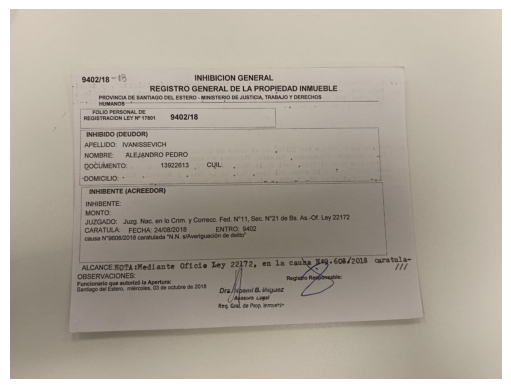

[1.00] 9402/18
[0.84] 13
[0.94] INHIBICION GENERAL
[0.99] REGISTRO GENERAL DE LA PROPIEDAD INMUEBLE
[0.83] PROVINCIA DE SANTIAGO DEL ESTERO
[0.71] MINISTERIO DE JUSTICIA, TRABAJO Y DERECHOS
[0.99] HUMANOS
[0.54] FOLIO PERSONAL DE
[0.70] REGISTRACION LEY NP 17801
[1.00] 9402/18
[0.94] INHIBIDO (DEUDOR)
[0.99] APELLIDO:
[1.00] IVANISSEVICH
[0.74] NOMBRE:
[0.84] ALEJANDRO PEDRO
[1.00] DOCUMENTO:
[1.00] 13922613
[0.87] CUIL:
[1.00] DOMICILIO:
[0.70] INHIBENTE (ACREEDOR)
[1.00] INHIBENTE
[1.00] MONTO:
[0.18] JUZGADO:   Juzg Nac: en lo Crim; y Correcc. Fed: N*11,Sec: N*21 de Bs As,-Of. Ley 22172
[0.99] CARATULA:
[0.98] FECHA: 24/08/2018
[0.96] ENTRO: 9402
[0.63] causa N*9608/2018 caratulada "N.N. slAveriguacin de delito'
[0.71] ALCANCENOTA Mediante
[0.94] Oficio Iey 22172,
[0.37] en la cauhe
[0.21] Neo
[0.60] 60872018
[0.59] caratuli
[1.00] OBSERVACIONES:
[0.94] Registro Responsable:
[0.82] Funcionario que autoriz la Apertura:
[0.25] Sancagoaei Estero, mircoles; 03 de octubre de 2018
[0.47] 

In [ ]:
# Mostrar imagen original
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# ====== Crear lector EasyOCR ======
reader = Reader(['es'], gpu=False)
results = reader.readtext(image)

# ====== Procesar OCR ======
texto_detectado = ""
for (bbox, text, prob) in results:
    texto = cleanup_text(text)
    texto_detectado += texto + "\n"
    print(f"[{prob:.2f}] {texto}")

print("\n=== TEXTO COMPLETO ===\n")
print(texto_detectado)

In [ ]:
# ====== Regex para extraer campos clave ======
def extraer_campos(texto):
    data = {}
    data["matricula"]  = re.search(r"(\d{4}/\d{2})", texto)
    data["apellido"]   = re.search(r"APELLIDO:\s*([A-ZÁÉÍÓÚÑ ]+)", texto)
    data["nombre"]     = re.search(r"NOMBRE:\s*([A-ZÁÉÍÓÚÑ ]+)", texto)
    data["documento"]  = re.search(r"DOCUMENTO:\s*(\d+)", texto)
    data["cuil"]       = re.search(r"CUIL:\s*([\d-]+)", texto)
    data["domicilio"]  = re.search(r"DOMICILIO:\s*(.*)", texto)
    data["juzgado"]    = re.search(r"JUZGADO:\s*(.*)", texto)
    data["caratula"]   = re.search(r"CARATULA:\s*(.*)", texto)
    data["fecha"]      = re.search(r"FECHA:\s*([\d/]+)", texto)
    data["entro"]      = re.search(r"ENTRO:\s*(\d+)", texto)
    data["alcance"]    = re.search(r"ALCANCE.*", texto)
    data["observaciones"] = re.search(r"OBSERVACIONES:(.*)", texto)

    # Limpieza
    for k,v in data.items():
        data[k] = v.group(1).strip() if v else None
    return data

campos = extraer_campos(texto_detectado)

print("\n=== CAMPOS EXTRAÍDOS ===\n")
for k,v in campos.items():
    print(f"{k}: {v}")

IndexError: no such group